<a href="https://colab.research.google.com/github/ynusinovich/streamflow-prediction/blob/main/Streamflow_prediction_version_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/streamflow prediction /HYSETS_combined_data_additional_part_2.csv')#, skiprows= 1, header = 0)
df_shape = df.shape
print(df_shape)

(7308580, 46)


In [4]:
df.sample(10)

,Unnamed: 0,watershed,time,watershedID,drainage_area,drainage_area_GSIM,flag_GSIM_boundaries,flag_artificial_boundaries,elevation,slope,...,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Flag_Land_Use_Extraction,Permeability_logk_m2,Porosity_frac,Flag_Subsoil_Extraction,Hydrometric_station_latitude,Hydrometric_station_longitude
6175364,6175364,245,1952-05-24,1191.0,997.973191,NaN,0.0,0.0,537.144714,0.663304,...,0.0251,0.0019,0.7177,0.0000,1,-15.846505,0.155188,1,49.32583,-100.70370
2055054,2055054,81,1987-06-28,1024.0,1030.074237,NaN,0.0,0.0,808.047734,0.720508,...,0.0467,0.0151,0.8282,0.0000,1,-15.417318,0.178298,1,53.03680,-113.32310
2235152,2235152,88,1997-07-29,1031.0,235.498482,NaN,0.0,0.0,777.132475,0.490820,...,0.0682,0.0154,0.8553,0.0000,1,-15.532637,0.172089,1,52.95916,-113.28000
4968224,4968224,197,1959-05-24,1143.0,273.554055,NaN,0.0,0.0,556.339748,0.261724,...,0.0335,0.0018,0.9011,0.0000,1,-16.497039,0.120159,1,52.01367,-104.25040
5553632,5553632,220,1975-03-03,1166.0,301.316920,NaN,0.0,0.0,518.836561,0.416308,...,0.0247,0.0045,0.6920,0.0000,1,-16.500000,0.120000,1,49.78344,-100.96640
6936505,6936505,275,1966-04-22,1230.0,641.055820,NaN,0.0,0.0,256.302965,0.283766,...,0.0380,0.0226,0.5614,0.0000,1,-11.800000,0.060000,1,50.32722,-97.04417
590561,590561,23,1979-11-20,915.0,1565.300000,1553.9760,1.0,0.0,1490.941410,8.791219,...,0.0332,0.0618,0.3742,0.0003,1,-15.552955,0.170995,1,50.71250,-113.88060
3094052,3094052,122,2003-02-20,1065.0,314.000000,316.9324,1.0,0.0,846.176897,1.954645,...,0.0274,0.0021,0.8608,0.0000,1,-14.294970,0.209658,1,49.49603,-106.75490
1655765,1655765,65,1998-04-14,1008.0,368.127627,NaN,0.0,0.0,643.203793,1.377648,...,0.0368,0.0453,0.7056,0.0000,1,-15.227888,0.188498,1,53.88880,-110.92110
4636055,4636055,183,2015-12-15,1129.0,9.700000,NaN,0.0,1.0,445.418393,4.602664,...,0.0000,0.0000,0.0000,0.0000,1,NaN,NaN,0,50.71667,-99.58333


In [5]:
df = df.drop(columns = ["Source", "Name", "watershed", "Official_ID", "drainage_area_GSIM", "Drainage_Area_GSIM_km2"])

In [6]:
df.describe()

,Unnamed: 0,watershedID,drainage_area,flag_GSIM_boundaries,flag_artificial_boundaries,elevation,slope,discharge,pr,tasmax,...,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Flag_Land_Use_Extraction,Permeability_logk_m2,Porosity_frac,Flag_Subsoil_Extraction,Hydrometric_station_latitude,Hydrometric_station_longitude
count,7.308580e+06,7.308580e+06,7.308580e+06,7.308580e+06,7.308580e+06,7.308580e+06,7.308580e+06,2.530926e+06,7.308540e+06,7.308543e+06,...,7.308580e+06,7.308580e+06,7.308580e+06,7.308580e+06,7308580.0,6.628126e+06,6.628126e+06,7.308580e+06,7.308580e+06,7.308580e+06
mean,3.654290e+06,1.108414e+03,1.366360e+03,2.655172e-01,9.310345e-02,6.612044e+02,1.321186e+00,3.063255e+00,1.276746e+00,8.557909e+00,...,3.395724e-02,1.513103e-02,6.073276e-01,3.172414e-05,1.0,-1.545851e+01,1.378128e-01,9.068966e-01,5.121218e+01,-1.057367e+02
std,2.109805e+06,2.221561e+02,4.395747e+03,4.416083e-01,2.905774e-01,2.762744e+02,2.233327e+00,1.585678e+01,3.900834e+00,1.422430e+01,...,6.215692e-02,2.693312e-02,3.085116e-01,3.605941e-04,0.0,1.332084e+00,4.121799e-02,2.905774e-01,1.524267e+00,5.765864e+00
min,0.000000e+00,8.550000e+02,1.990000e+00,0.000000e+00,0.000000e+00,2.352962e+02,1.088646e-01,-1.000000e-03,0.000000e+00,-3.931247e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,-1.650000e+01,1.266684e-02,0.000000e+00,4.900040e+01,-1.139735e+02
25%,1.827145e+06,1.015000e+03,1.666182e+02,0.000000e+00,0.000000e+00,5.004354e+02,4.628895e-01,0.000000e+00,0.000000e+00,-1.610247e+00,...,1.840000e-02,1.200000e-03,3.742000e-01,0.000000e+00,1.0,-1.650000e+01,1.200000e-01,1.000000e+00,4.973217e+01,-1.120644e+02
50%,3.654290e+06,1.087500e+03,4.175000e+02,0.000000e+00,0.000000e+00,6.096170e+02,8.175646e-01,5.000000e-02,0.000000e+00,1.000000e+01,...,2.970000e-02,4.300000e-03,7.215500e-01,0.000000e+00,1.0,-1.593082e+01,1.200000e-01,1.000000e+00,5.108472e+01,-1.044717e+02
75%,5.481434e+06,1.163000e+03,1.030074e+03,1.000000e+00,0.000000e+00,7.775456e+02,1.346667e+00,6.500000e-01,6.274220e-01,2.060000e+01,...,3.680000e-02,1.600000e-02,8.588000e-01,0.000000e+00,1.0,-1.520000e+01,1.665996e-01,1.000000e+00,5.260833e+01,-1.007037e+02
max,7.308579e+06,2.371000e+03,5.505924e+04,1.000000e+00,1.000000e+00,1.915513e+03,2.371679e+01,8.990000e+02,1.893805e+02,4.282429e+01,...,1.000000e+00,2.143000e-01,1.000000e+00,5.700000e-03,1.0,-1.175714e+01,2.700000e-01,1.000000e+00,5.395278e+01,-9.703747e+01


In [7]:
df.isna().sum()

Unnamed: 0                             0
time                                   0
watershedID                            0
drainage_area                          0
flag_GSIM_boundaries                   0
flag_artificial_boundaries             0
elevation                              0
slope                                  0
discharge                        4777654
pr                                    40
tasmax                                37
tasmin                                15
centroid_lat                           0
centroid_lon                           0
Centroid_Lat_deg_N                     0
Centroid_Lon_deg_E                     0
Drainage_Area_km2                      0
Flag_GSIM_boundaries                   0
Flag_Artificial_Boundaries             0
Elevation_m                            0
Slope_deg                              0
Gravelius                         680454
Perimeter                         680454
Flag_Shape_Extraction                  0
Aspect_deg      

In [8]:
df.dtypes

Unnamed: 0                         int64
time                              object
watershedID                      float64
drainage_area                    float64
flag_GSIM_boundaries             float64
flag_artificial_boundaries       float64
elevation                        float64
slope                            float64
discharge                        float64
pr                               float64
tasmax                           float64
tasmin                           float64
centroid_lat                     float64
centroid_lon                     float64
Centroid_Lat_deg_N               float64
Centroid_Lon_deg_E               float64
Drainage_Area_km2                float64
Flag_GSIM_boundaries               int64
Flag_Artificial_Boundaries         int64
Elevation_m                      float64
Slope_deg                        float64
Gravelius                        float64
Perimeter                        float64
Flag_Shape_Extraction              int64
Aspect_deg      

In [9]:
df["time"] = pd.to_datetime(df["time"])
df.set_index('time', inplace = True)
for watershedID in set(df["watershedID"]):
  df[df["watershedID"] == watershedID] = df[df["watershedID"] == watershedID].interpolate(method='time', axis=0, limit_direction="both")
  df.dropna(inplace = True)

In [10]:
df_sample = df.drop(["flag_GSIM_boundaries", "flag_artificial_boundaries",
               "Flag_GSIM_boundaries", "Flag_Artificial_Boundaries", "Flag_Shape_Extraction",
               "Flag_Terrain_Extraction", "Flag_Land_Use_Extraction", "Flag_Subsoil_Extraction",
               "drainage_area", "elevation", "slope", "centroid_lat",
               "centroid_lon", "Centroid_Lat_deg_N", "Centroid_Lon_deg_E", "Drainage_Area_km2",
               "Elevation_m", "Slope_deg", "Gravelius", "Perimeter",
               "Aspect_deg", "Land_Use_Forest_frac", "Land_Use_Grass_frac", "Land_Use_Wetland_frac",
               "Land_Use_Water_frac", "Land_Use_Urban_frac", "Land_Use_Shrubs_frac",
               "Land_Use_Crops_frac", "Land_Use_Snow_Ice_frac", "Permeability_logk_m2", "Porosity_frac",
               "Hydrometric_station_latitude", "Hydrometric_station_longitude"],axis=1)

In [11]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

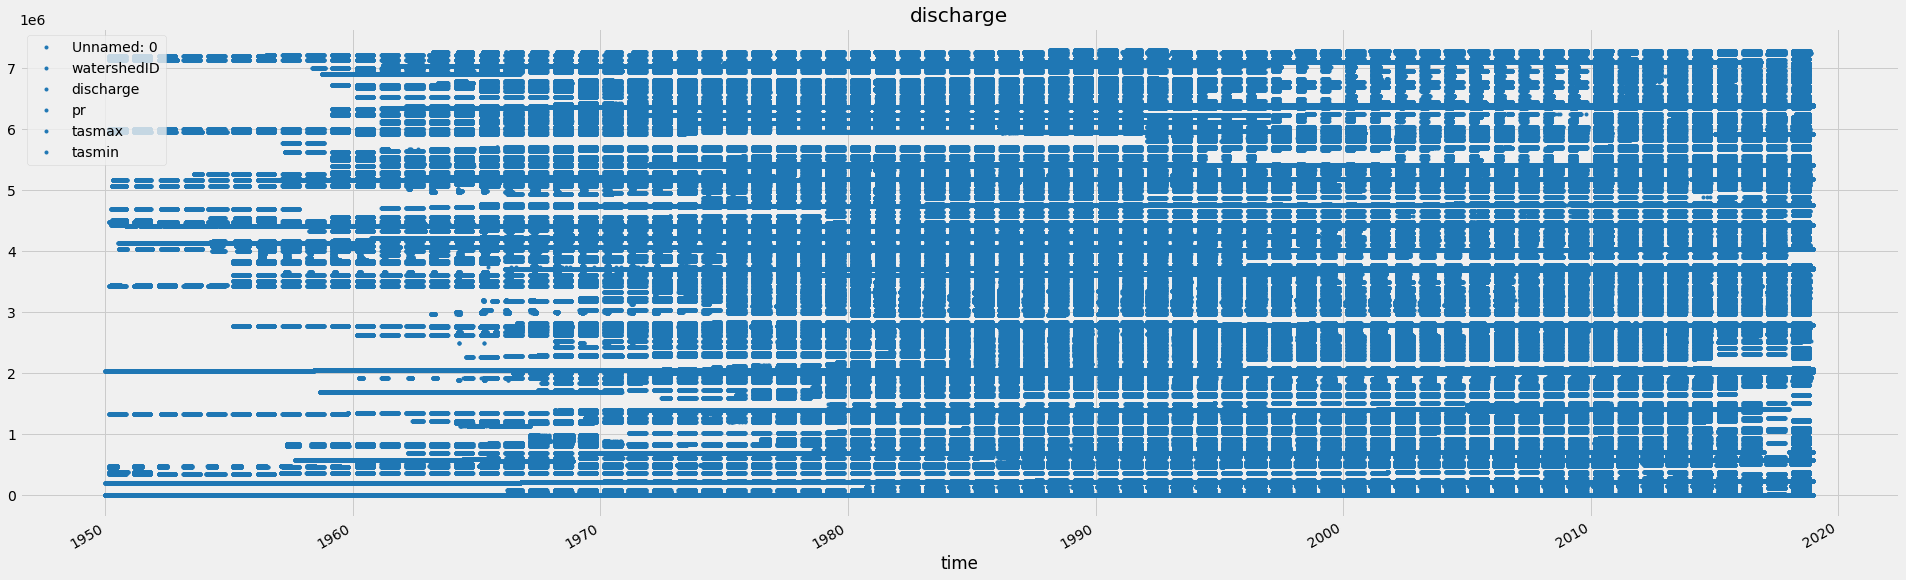

In [12]:
df_sample.plot(style='.',
        figsize=(30, 10),
        color=color_pal[0],
        title='discharge')
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


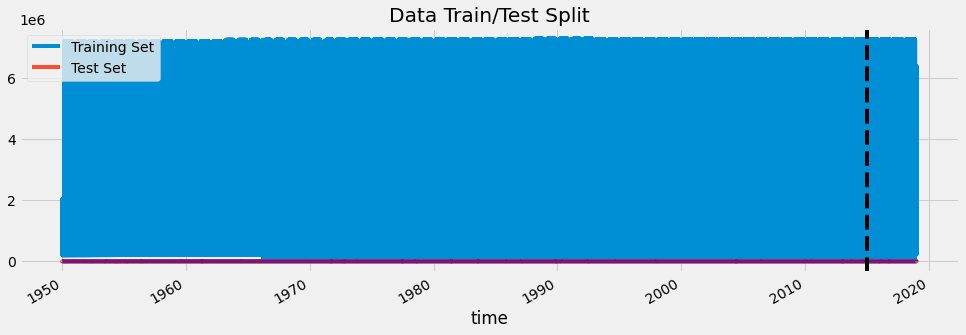

In [13]:
train = df_sample.loc[df.index < '01-01-2015']
test = df_sample.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [14]:
def create_features(df_sample):
    """
    Create time series features based on time series index.
    """
    df_sample = df.copy()
   
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

Feature Target relationship

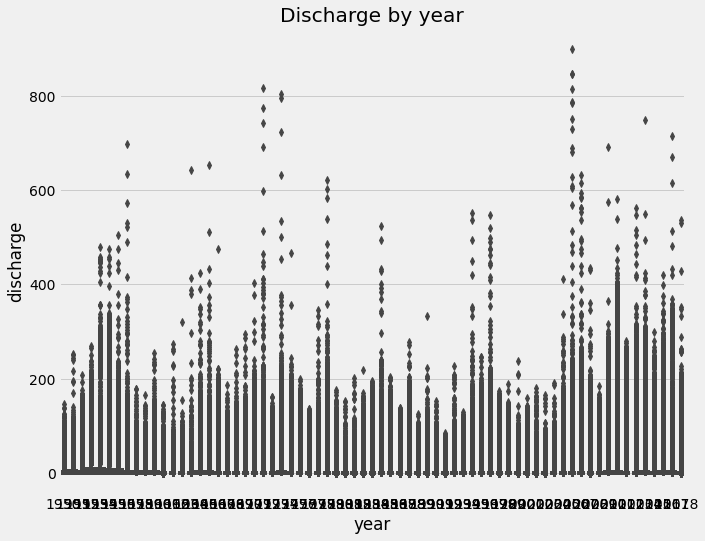

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='year', y='discharge')
ax.set_title('Discharge by year')
plt.show()

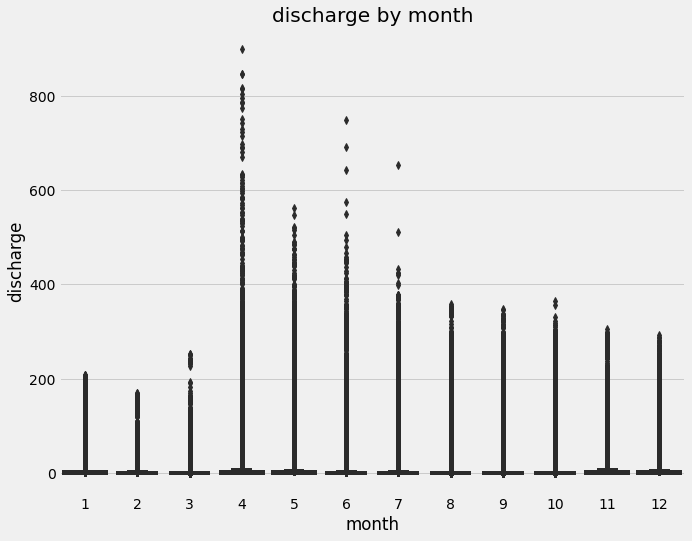

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='discharge', palette='Blues')
ax.set_title('discharge by month')
plt.show()

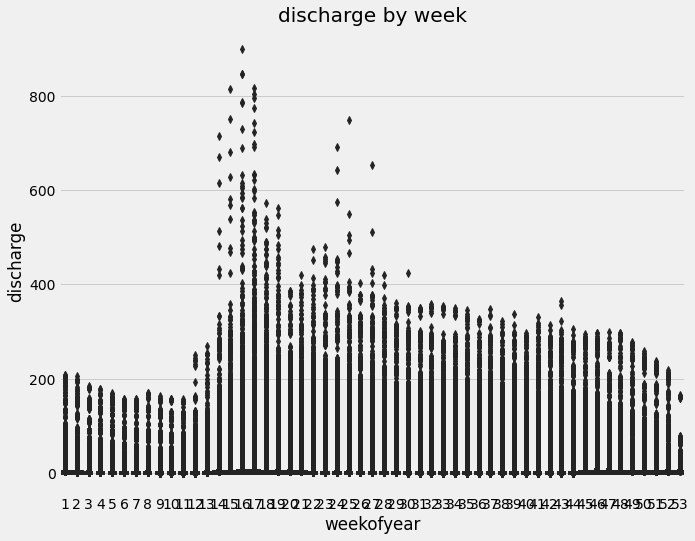

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='weekofyear', y='discharge', palette='Blues')
ax.set_title('discharge by week')
plt.show()

In [18]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'discharge'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [19]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[22:32:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:16.2919	validation_1-rmse:16.2919
[100]	validation_0-rmse:15.922	validation_1-rmse:15.922
[200]	validation_0-rmse:15.8256	validation_1-rmse:15.8256
[300]	validation_0-rmse:15.7909	validation_1-rmse:15.7909
[400]	validation_0-rmse:15.7817	validation_1-rmse:15.7817
[500]	validation_0-rmse:15.7762	validation_1-rmse:15.7762
[600]	validation_0-rmse:15.7701	validation_1-rmse:15.7701
[700]	validation_0-rmse:15.7657	validation_1-rmse:15.7657
[800]	validation_0-rmse:15.7613	validation_1-rmse:15.7613
[900]	validation_0-rmse:15.7581	validation_1-rmse:15.7581
[999]	validation_0-rmse:15.7546	validation_1-rmse:15.7546


XGBRegressor(early_stopping_rounds=50, learning_rate=0.01, n_estimators=1000)

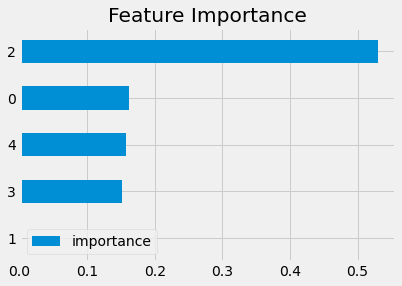

In [20]:
fi = pd.DataFrame(data=reg.feature_importances_,
                         columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:
test['prediction'] = reg.predict(X_test)
df_sample = df_sample.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df_sample[['Discharge']].plot(figsize=(15, 5))
df_sample['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [ ]:
score = np.sqrt(mean_squared_error(test['discharge'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')